<a href="https://colab.research.google.com/github/John-Peter-R/ML/blob/main/Project_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/advertising.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dftv=dataset.TV
dfr=dataset.Radio
dfn=dataset.Newspaper
dfs=dataset.Sales

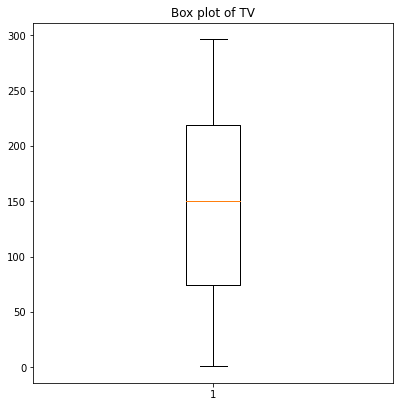

In [ ]:
fig=plt.figure(figsize=(5,5)) 
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(dftv)
plt.title('Box plot of TV')
plt.show()

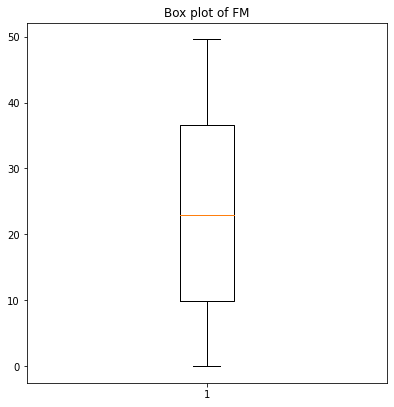

In [ ]:
fig=plt.figure(figsize=(5,5)) 
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(dfr)
plt.title('Box plot of FM')
plt.show()

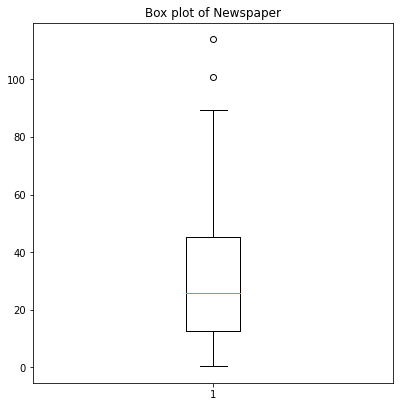

In [ ]:
fig=plt.figure(figsize=(5,5)) 
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(dfn)
plt.title('Box plot of Newspaper')
plt.show()

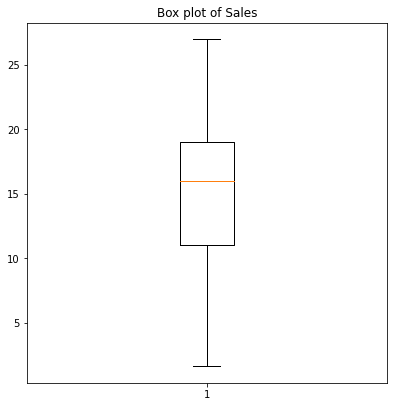

In [ ]:
fig=plt.figure(figsize=(5,5)) 
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(dfs)
plt.title('Box plot of Sales')
plt.show()

In [ ]:
df3=dataset.copy(deep=True)
df3.drop('Newspaper',axis=1,inplace=True)
df3

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,14.0
197,177.0,9.3,14.8
198,283.6,42.0,25.5


In [ ]:
X1 = df3.iloc[:, :-1].values
y1 = df3.iloc[:, -1].values

In [ ]:
df4=df3.copy(deep=True)
df4.drop('Radio',axis=1,inplace=True)
df4

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [ ]:
X3 = dataset.iloc[:, :-1].values
y3 = dataset.iloc[:, -1].values

<function matplotlib.pyplot.show>

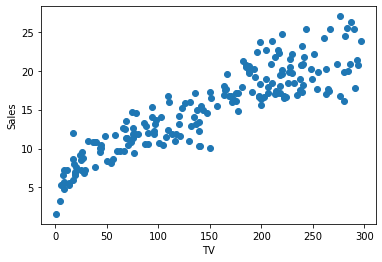

In [ ]:
xax=X[:,0]
yax=y
plt.scatter(xax,yax)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show

<function matplotlib.pyplot.show>

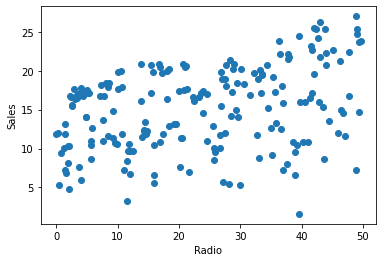

In [ ]:
xax=X[:,1]
yax=y
plt.scatter(xax,yax)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show

<function matplotlib.pyplot.show>

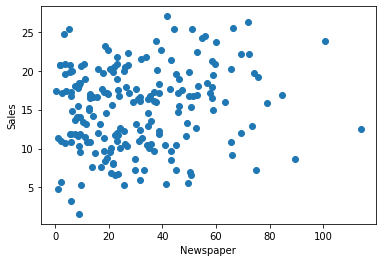

In [ ]:
xax=X[:,2]
yax=y
plt.scatter(xax,yax)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show

#One independent variable

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor3 = LinearRegression()
regressor3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y4_pred = regressor3.predict(X3_test)
y4_pred
r_sq2 = regressor3.score(X3, y3)
r_sq2

0.9017760223584486

#Two independent variables

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [ ]:
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1_pred = regressor1.predict(X1_test)
r_sq1=regressor1.score(X1,y1)
r_sq1

0.9023271513637827

#Three independent variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
r_sq=regressor.score(X,y)
r_sq

0.9021417667568035

In [ ]:
results = smf.ols('Sales~TV+Radio+Newspaper ', data=dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           8.13e-99
Time:                        14:52:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [ ]:
df2=dataset.copy(deep=True)
df2['tv_radio']=df2['TV']*df2['Radio']
results = smf.ols('Sales~TV+Radio+Newspaper+tv_radio ', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     518.6
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          1.08e-102
Time:                        14:55:46   Log-Likelihood:                -370.80
No. Observations:                 200   AIC:                             751.6
Df Residuals:                     195   BIC:                             768.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1723      0.419     14.722      0.0

In [ ]:
df2=dataset.copy(deep=True)
df2['tv_radio']=df2['TV']*df2['Radio']
df2['tv_np']=df2['TV']*df2['Newspaper']
df2['radio_np']=df2['Radio']*df2['Newspaper']
results = smf.ols('Sales~TV+Radio+Newspaper+tv_radio+tv_np+radio_np ', data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     344.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.16e-100
Time:                        14:56:57   Log-Likelihood:                -370.20
No. Observations:                 200   AIC:                             754.4
Df Residuals:                     193   BIC:                             777.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2650      0.531     11.805      0.0